In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.shape

(200, 4)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.isnull().sum()#no null values

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

##VISUALIZATION


###UNIVARIATE ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

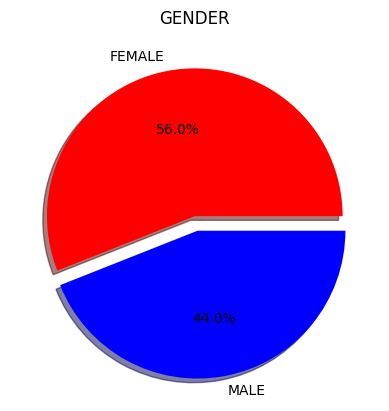

In [ ]:
plt.pie(df.Gender.value_counts(),[0,0.1],labels=['FEMALE','MALE'],autopct='%1.1f%%',shadow=True,colors=['r','b'])
plt.title('GENDER')
plt.show()

<ipython-input-13-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

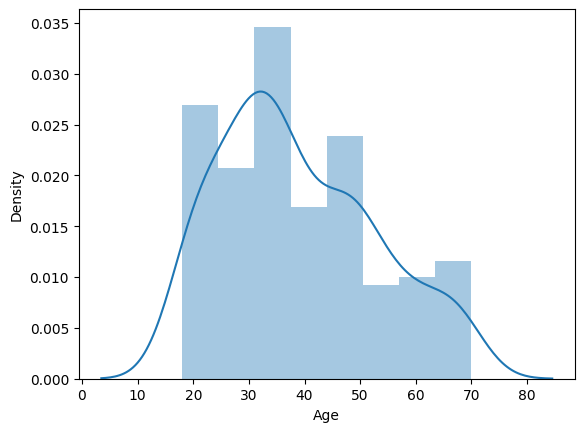

In [ ]:
sns.distplot(df.Age)

<ipython-input-14-5c9bfeb4bab1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

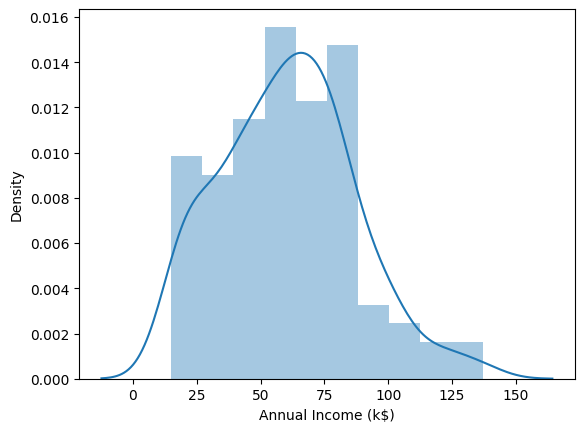

In [ ]:
sns.distplot(df['Annual Income (k$)'])

<ipython-input-15-beed7b40d5ab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

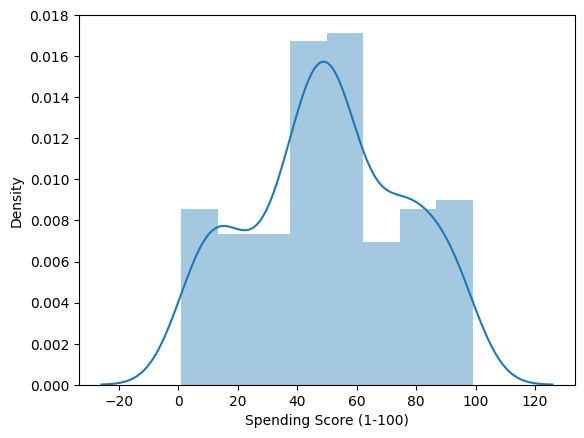

In [ ]:
sns.distplot(df['Spending Score (1-100)'])

###BIVARIATE ANALYSIS

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

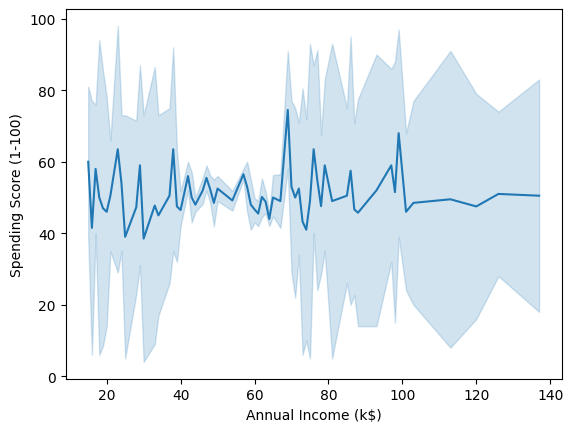

In [ ]:
sns.lineplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

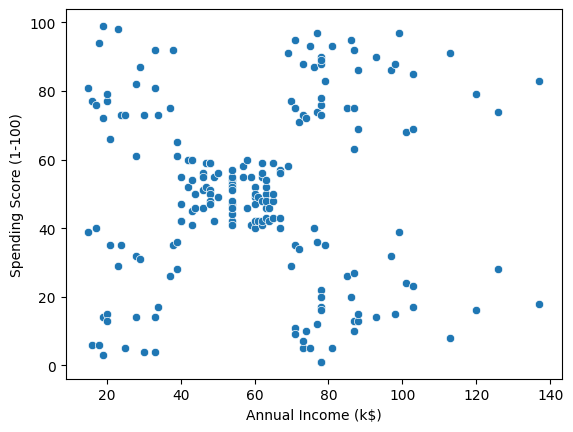

In [ ]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

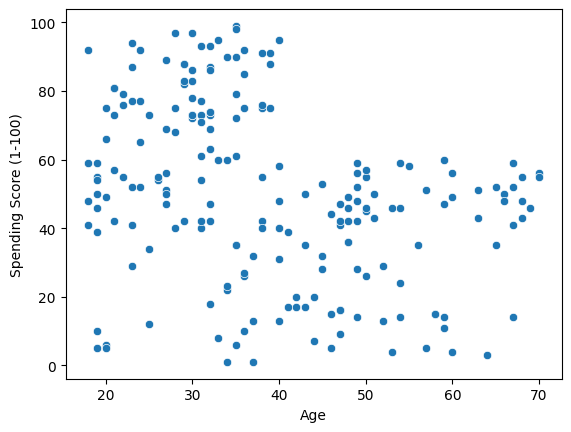

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'])

<Axes: >

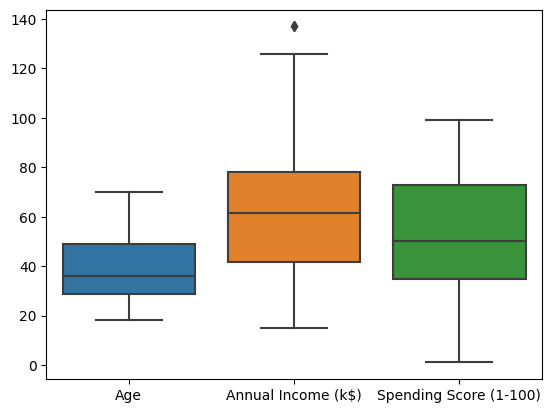

In [ ]:
sns.boxplot(df)

###MULTIVARIATE ANALYSIS

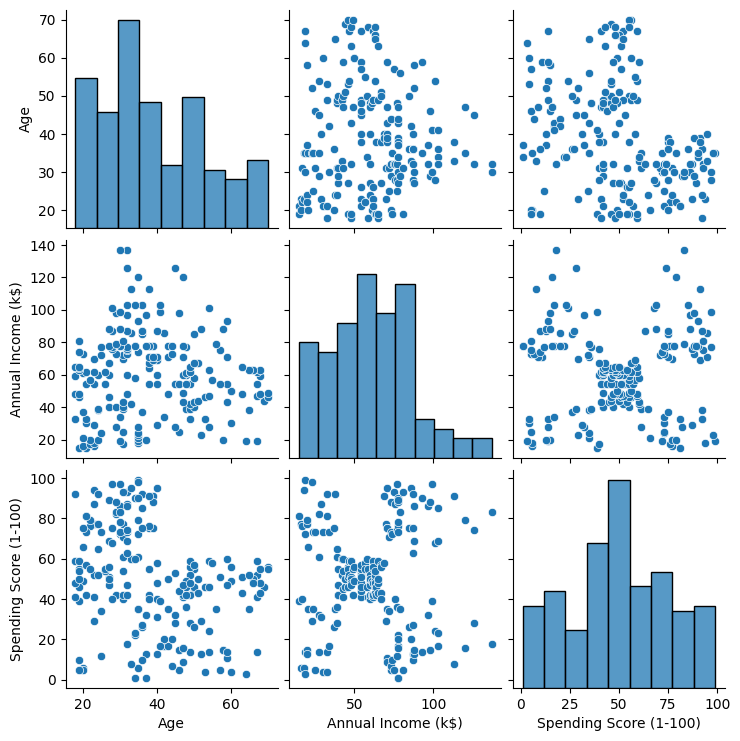

In [ ]:
sns.pairplot(df)

<ipython-input-23-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

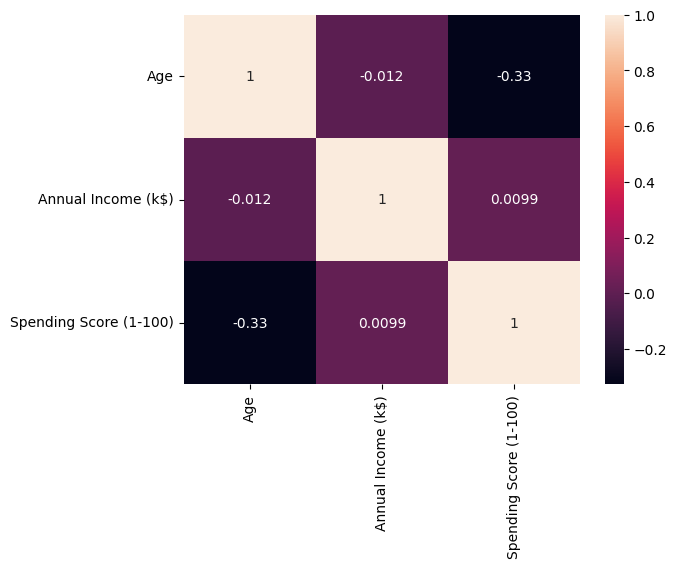

In [ ]:
sns.heatmap(df.corr(),annot=True)

##OUTLIER REPLACEMENT

In [ ]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q3-1.5*IQR
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_limit,df['Annual Income (k$)'].median(),df['Annual Income (k$)'])

<Axes: >

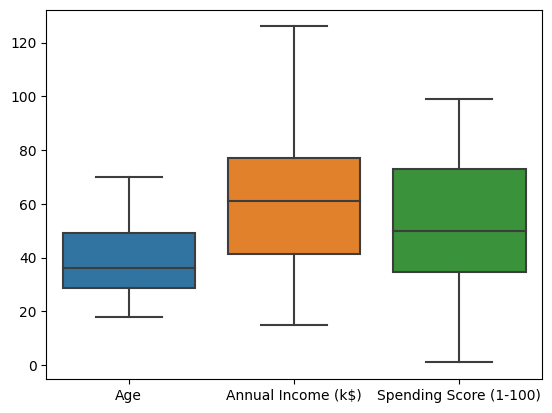

In [ ]:
sns.boxplot(df)

##ENCODING THE CATEGORICAL COLUMN

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    object 
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


In [ ]:
df.Gender=le.fit_transform(df.Gender)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


##SCALING THE DATA

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [ ]:
scaled_df=pd.DataFrame(scale.fit_transform(df),columns=df.columns)

In [ ]:
scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


##MODEL BUILDING

In [ ]:
from sklearn import cluster

In [ ]:
#Checking k from 1 to 10
error=[]
for i in range(1,15):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(scaled_df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'error')

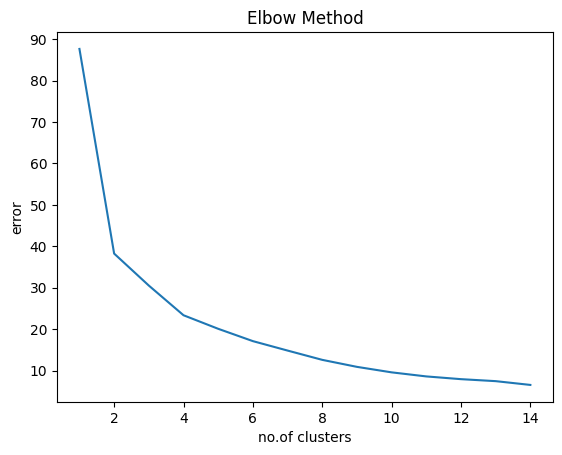

In [ ]:
plt.plot(range(1,15),error)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('error')
#4 clusters formed

In [ ]:
km_model = cluster.KMeans(n_clusters=4,init = 'k-means++',random_state=0)

In [ ]:
km_model.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
pred=km_model.predict(scaled_df)
scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [ ]:
km_model.predict([[1,0.019231,0.000000,0.387755]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [ ]:
km_model.predict([[0,0.096154,0.009009,0.775510]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [ ]:
km_model.predict([[0,0.250000	,0.018018,0.397959]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

Therefore, the model is trained and is tested for random observations